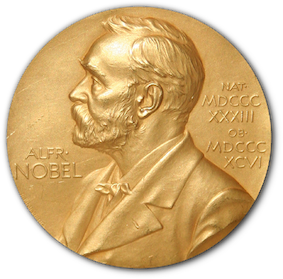

Le prix Nobel est l'une des récompenses internationales les plus prestigieuses depuis 1901. Chaque année, des prix sont décernés en chimie, littérature, physique, physiologie ou médecine, économie et paix. En plus de l'honneur, du prestige et d'une somme d'argent substantielle, le lauréat reçoit également une médaille d'or avec une image d'Alfred Nobel (1833–1896), qui a établi le prix.

La Fondation Nobel a mis à disposition un ensemble de données de tous les lauréats depuis le début des prix en 1901 jusqu'en 2023. Le jeu de données utilisé dans ce projet provient de l'API du prix Nobel et est disponible dans le fichier nobel.csv dans le dossier data.

Dans ce projet, vous aurez l'occasion d'explorer et de répondre à plusieurs questions liées à ces données primées. Nous vous encourageons également à explorer d'autres questions qui vous intéressent !

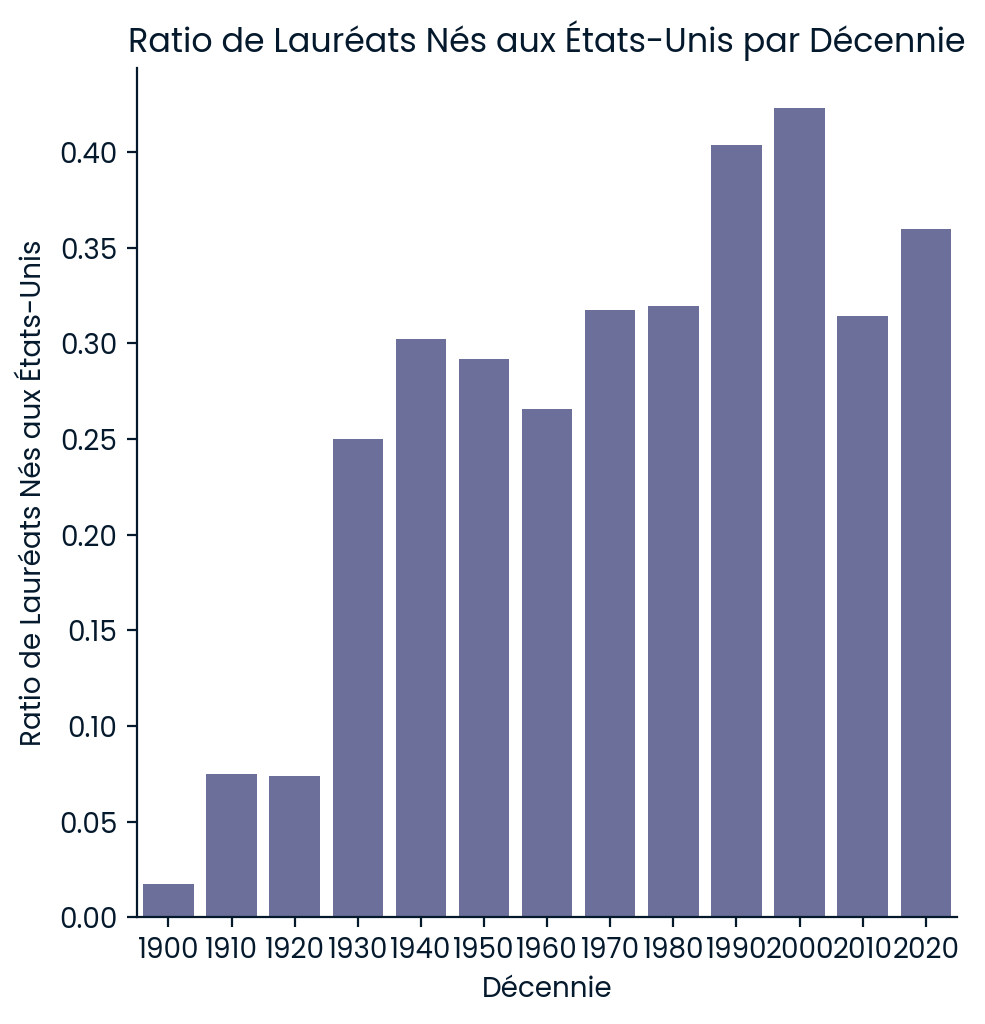

In [3]:
# ----- Importation des Bibliothèques Requises ----- 
import pandas as pd  
import seaborn as sns  
import numpy as np  
import matplotlib.pyplot as plt

# ----- Chargement des Données ----- 
nobel = pd.read_csv('data/nobel.csv')

# ----- Genre et Pays de Naissance ----- 
# Comptage des genres  
gender_count = nobel['sex'].value_counts()
top_gender = "Male"  # Genre le plus attribué

# Comptage des pays de naissance  
country_count = nobel['birth_country'].value_counts()
top_country = 'United States of America'  # Pays le plus attribué

# ----- Analyse des Lauréats Nés aux États-Unis ----- 
# Création d'une colonne pour indiquer les lauréats nés aux États-Unis  
nobel['us_born'] = nobel['birth_country'] == 'United States of America'

# Création d'une colonne pour la décennie  
nobel['decade'] = (nobel['year'] // 10) * 10

# Conversion de la colonne 'decade' en entier  
nobel['decade'] = nobel['decade'].astype(int)

# ----- Calcul du Ratio de Lauréats Nés aux États-Unis ----- 
# Regroupement par décennie et calcul de la moyenne des lauréats nés aux États-Unis  
nobel_grouped = nobel.groupby(['decade'], as_index=False)['us_born'].mean()

# Visualisation du ratio des lauréats nés aux États-Unis par décennie  
sns.catplot(x='decade', y='us_born', data=nobel_grouped, kind='bar')
plt.title('Ratio de Lauréats Nés aux États-Unis par Décennie')
plt.xlabel('Décennie')
plt.ylabel('Ratio de Lauréats Nés aux États-Unis')
plt.show()

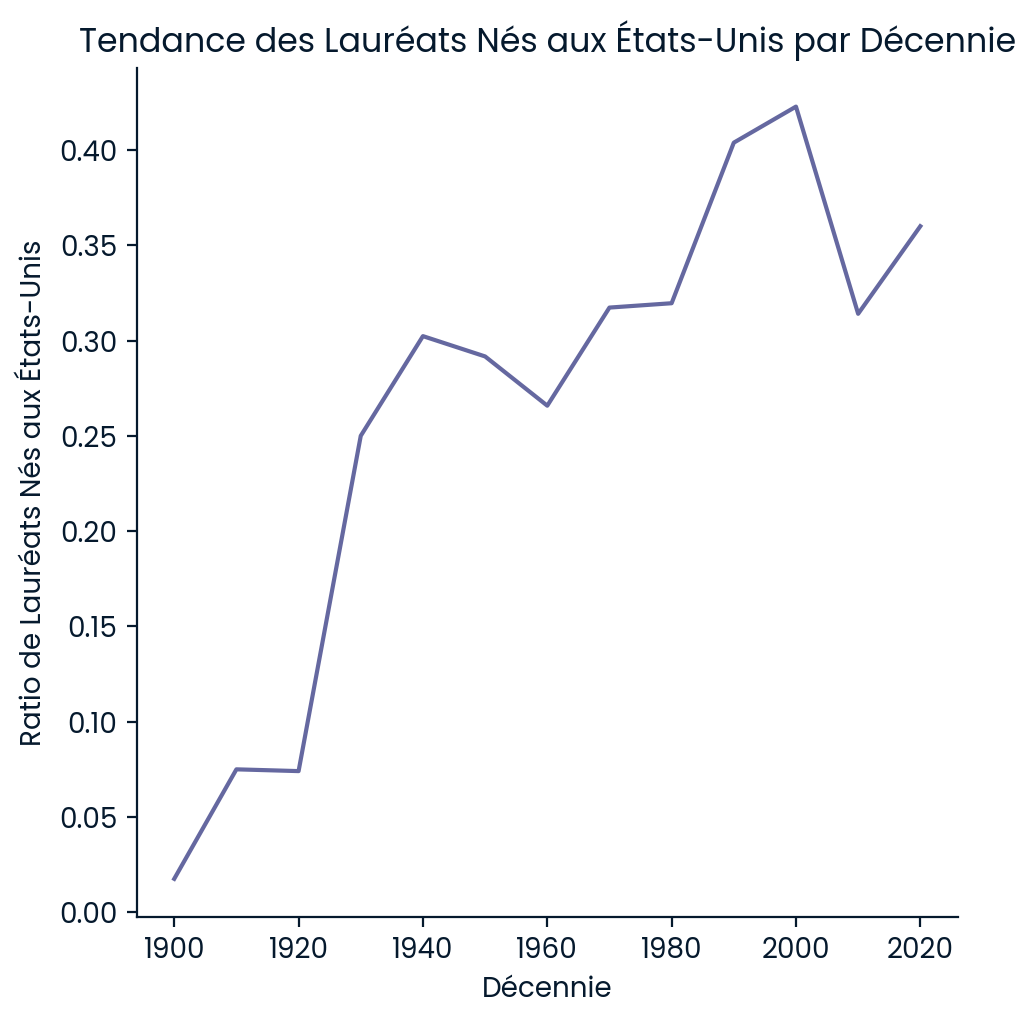

In [4]:
# Identification de la décennie avec le plus haut ratio de lauréats nés aux États-Unis  
max_usa_born = nobel_grouped[nobel_grouped['us_born'] == nobel_grouped['us_born'].max()]['decade'].values[0]
max_decade_usa = max_usa_born

# Visualisation relationnelle du ratio de lauréats nés aux États-Unis  
sns.relplot(x='decade', y='us_born', data=nobel_grouped, kind='line')
plt.title('Tendance des Lauréats Nés aux États-Unis par Décennie')
plt.xlabel('Décennie')
plt.ylabel('Ratio de Lauréats Nés aux États-Unis')
plt.show()


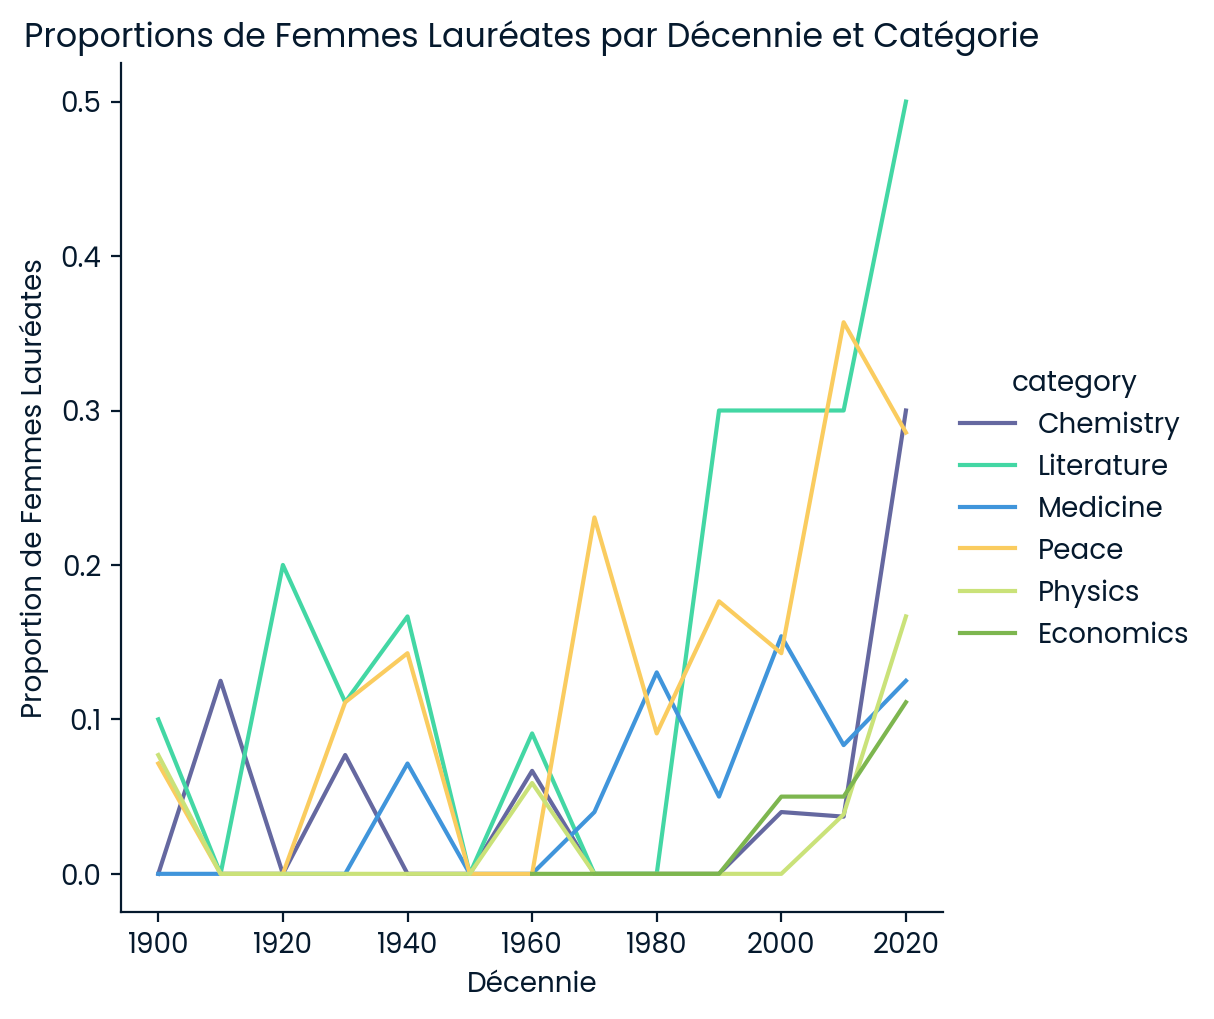

Première Femme Lauréate : Marie Curie, née Sklodowska
Catégorie : Physics


In [5]:
# ----- Q3: Proportions de Femmes Lauréates ----- 
# Création d'une colonne pour les lauréates femmes  
nobel['female_w'] = nobel['sex'] == 'Female'

# Regroupement des lauréates femmes par décennie et catégorie  
f_grouped = nobel.groupby(['decade', 'category'], as_index=False)['female_w'].mean()

# Identification de la décennie et de la catégorie avec la plus grande proportion de lauréates femmes  
max_female = f_grouped.loc[f_grouped['female_w'].idxmax()]
max_female_dict = {max_female['decade']: max_female['category']}

# Visualisation des proportions de femmes lauréates par décennie et catégorie  
sns.relplot(x='decade', y='female_w', data=f_grouped, kind='line', hue='category')
plt.title('Proportions de Femmes Lauréates par Décennie et Catégorie')
plt.xlabel('Décennie')
plt.ylabel('Proportion de Femmes Lauréates')
plt.show()

# ----- Q4: Identification de la Première Femme Lauréate ----- 
# Filtrage des données pour trouver la première femme lauréate  
number_one = nobel[nobel['female_w']]
first_w = number_one.groupby('decade', as_index=False)['female_w'].mean()

# Identification de la première femme lauréate  
min_row = number_one[number_one['decade'] == number_one['decade'].min()]
first_woman_name = min_row['full_name'].values[0]
first_woman_category = min_row['category'].values[0]

In [6]:
print(f'Première Femme Lauréate : {first_woman_name}')
print(f'Catégorie : {first_woman_category}')

Première Femme Lauréate : Marie Curie, née Sklodowska
Catégorie : Physics


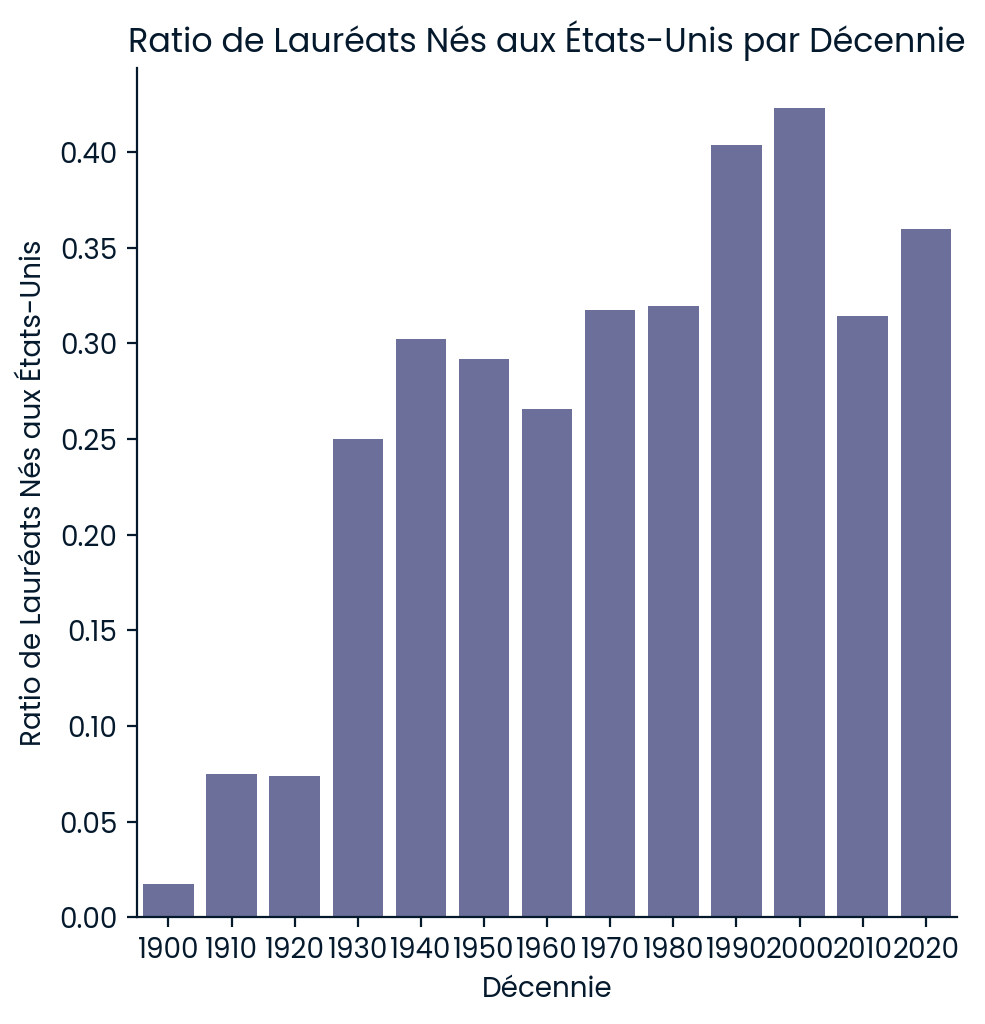

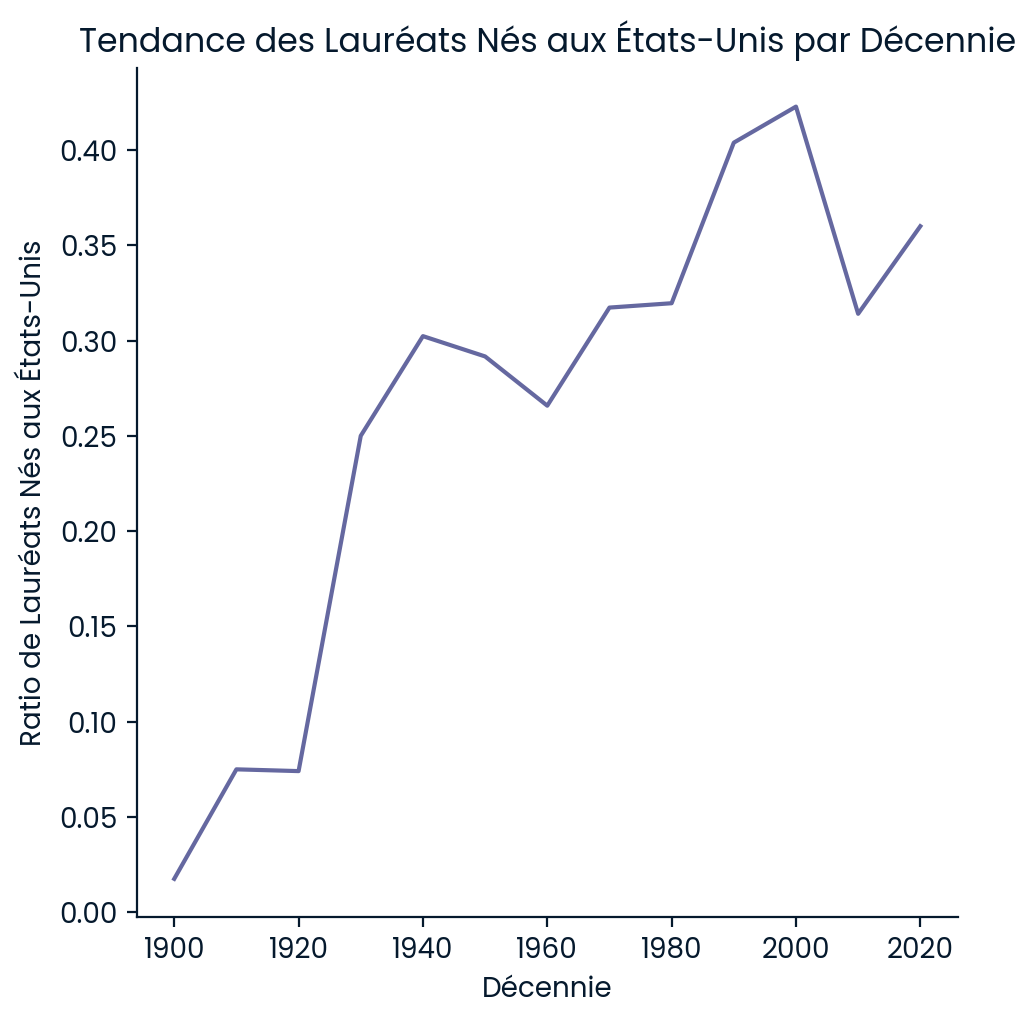

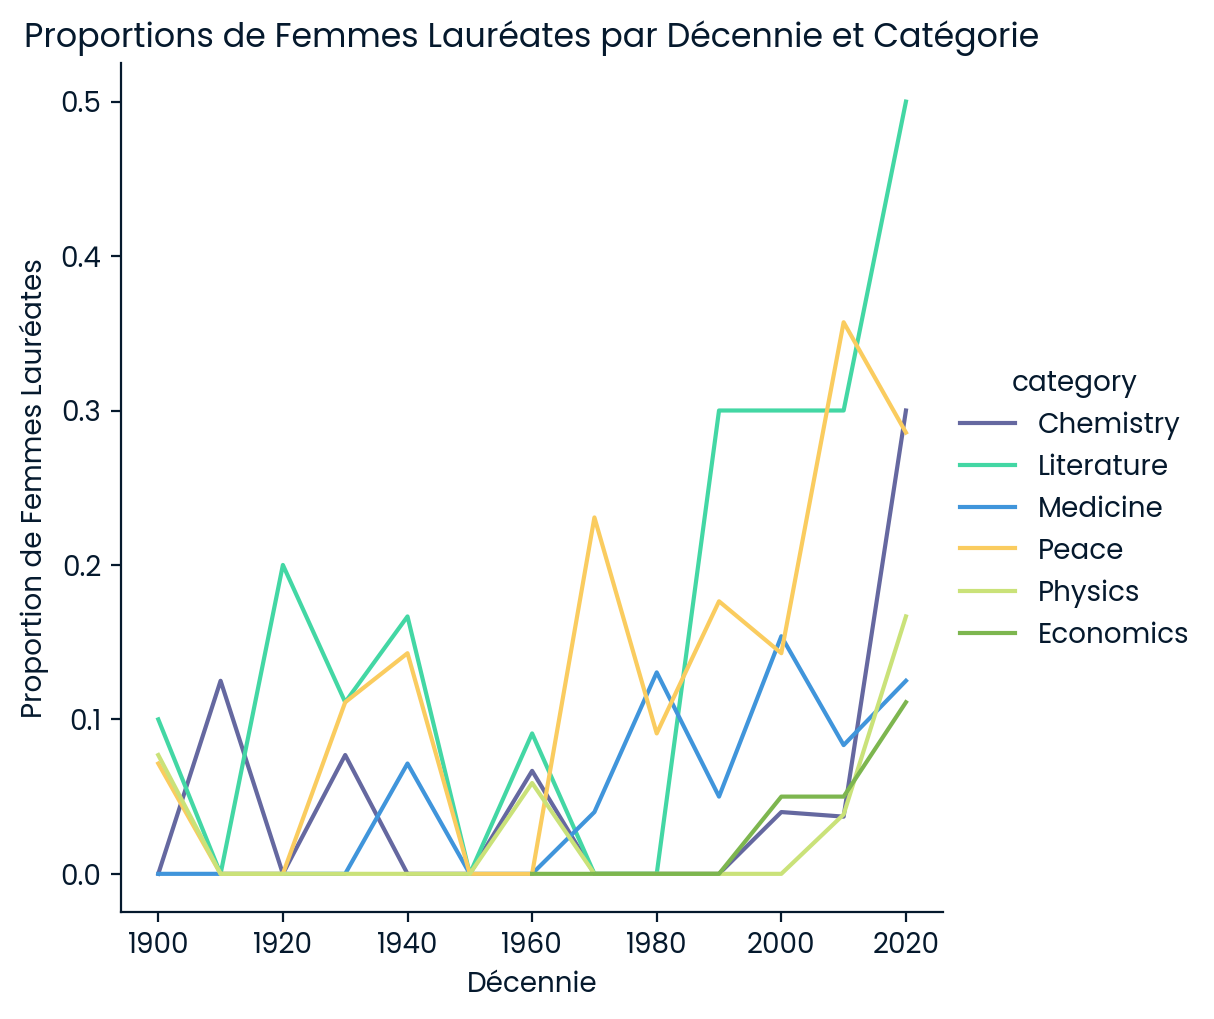

Première Femme Lauréate : Marie Curie, née Sklodowska
Catégorie : Physics
Lauréats ayant gagné plusieurs fois :
['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']


In [2]:
# ----- Q5: Détermination des Lauréats Répétitifs ----- 
winner_counts = nobel['full_name'].value_counts()
repeat_winners = winner_counts[winner_counts >= 2].index.tolist()

print('Lauréats ayant gagné plusieurs fois :')
print(repeat_winners)